#**Modelos de pronósticos**

El dataset Iris es un conjunto de datos de clasificación multiclase clásico y muy sencillo. Introducido por el estadístico y biólogo británico Ronald Fisher en su artículo de 1936 "The use of multiple measurements in taxonomic problems". El conjunto de datos de Iris contiene cuatro características (longitud y anchura de sépalos y pétalos) de 50 muestras de tres especies de flores Iris (Iris setosa, Iris virginica e Iris versicolor).

## **Beneficios de este ejercicio**
### Leer y Entender los Datos

- Importar el conjunto de datos de iris en un DataFrame de Pandas.
- Obtener información básica sobre los datos, como la estructura, las primeras filas, los tipos de datos, estadísticas descriptivas y la distribución de las especies.

### Explorar y Visualizar los Datos

- Utilizar métodos de clasificación, dividir-aplicar-combinar, y visualización para identificar diferencias entre las especies de iris.
- Crear gráficos y análisis estadísticos para entender cómo varían las mediciones entre las especies.

### Desarrollar Reglas de Clasificación

- Escribir un conjunto de reglas lógicas que permitan predecir la especie de iris basada en las mediciones de pétalos y sépalos.

### Crear una Función de Predicción

- Definir una función que acepte una fila de datos y devuelva una especie predicha.
- Utilizar esta función para hacer predicciones en todas las filas del conjunto de datos y verificar la precisión de las predicciones.

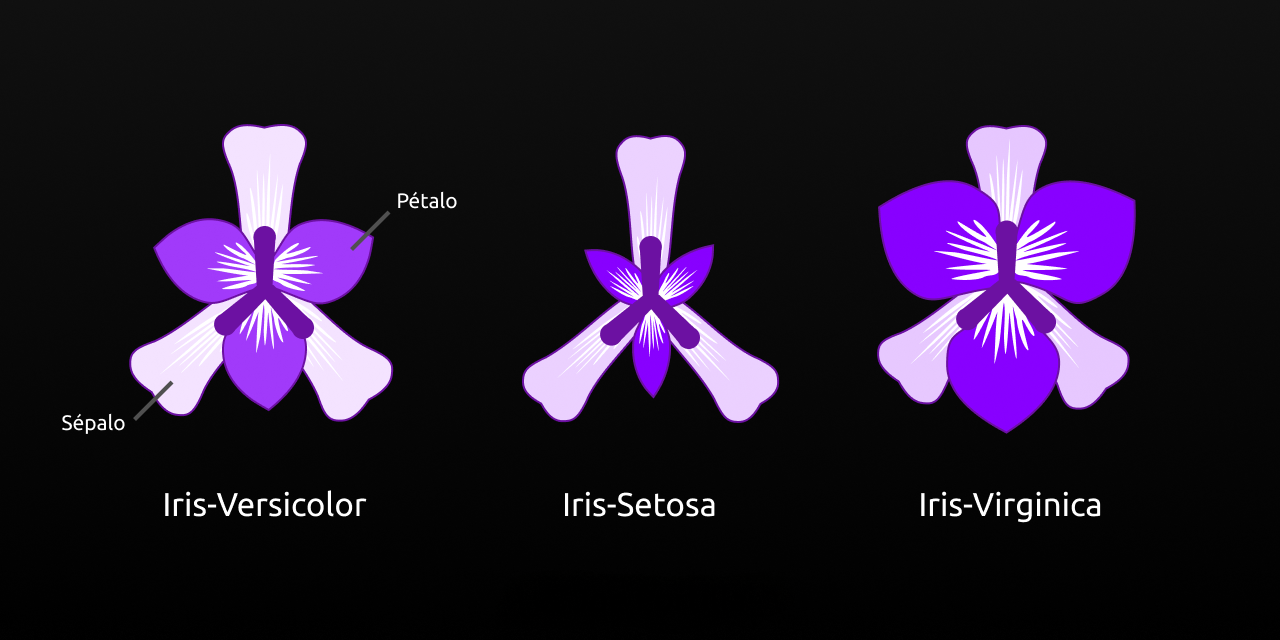

## **Principales Aprendizajes**

### Manipulación de Datos con Pandas

- Lectura de archivos CSV y creación de DataFrames.
- Exploración de datos utilizando métodos como `shape`, `head`, `dtypes`, `describe`, `value_counts` y `isnull`.

### Análisis Estadístico y Visualización de Datos

- Agrupación de datos y cálculo de estadísticas agrupadas.
- Creación de histogramas, diagramas de caja y gráficos de dispersión.
- Uso de mapas de color para visualizar la relación entre las características y la especie de iris.

### Ingeniería de Características

- Creación de nuevas características a partir de las existentes (ej. `petal_area`).
- Análisis de las nuevas características para mejorar la clasificación.

### Reglas de Clasificación y Predicción

- Desarrollo de reglas lógicas para clasificar datos en categorías.
- Implementación de una función de clasificación personalizada.
- Evaluación de la precisión de las predicciones comparándolas con los valores reales.

## **Ejercicio: "Aprendizaje humano" con datos de iris**

¿Puedes predecir las especies de un iris usando mediciones de pétalos y sépalo?

1. Lea los datos de Iris en un Pandas DataFrame, incluidos los nombres de la columna.
2. Recopile información básica sobre los datos.
3. Use la clasificación, la combinación de aplicaciones divididas y/o la visualización para buscar diferencias entre las especies.
4. Escriba un conjunto de reglas que podrían usarse para predecir especies basadas en las mediciones de iris.

**Bonificación**: Defina una función que acepte una fila de datos y devuelva una especie predicha. Luego, use esa función para hacer predicciones para todas las filas de datos existentes y verificar la precisión de sus predicciones.




In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# display plots in the notebook
%matplotlib inline

# increase default figure and font sizes for easier viewing
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 14

## Task 1

Read the iris data into a pandas DataFrame, including column names.

In [ ]:
# define a list of column names (as strings)
col_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

# define the URL from which to retrieve the data (as a string)
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

# retrieve the CSV file and add the column names
iris = pd.read_csv(url, header=None, names=col_names)

## Task 2

Gather some basic information about the data.

In [ ]:
iris.shape

(150, 5)

In [ ]:
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
iris.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
species          object
dtype: object

In [ ]:
iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
iris.species.value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
dtype: int64

In [ ]:
iris.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

## Task 3

Use sorting, split-apply-combine, and/or visualization to look for differences between species.

### sorting

In [ ]:
# sort the DataFrame by petal_width and display the NumPy array
print iris.sort('petal_width').values

[[5.2 4.1 1.5 0.1 'Iris-setosa']
 [4.3 3.0 1.1 0.1 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [4.8 3.0 1.4 0.1 'Iris-setosa']
 [4.9 3.1 1.5 0.1 'Iris-setosa']
 [5.1 3.5 1.4 0.2 'Iris-setosa']
 [5.2 3.5 1.5 0.2 'Iris-setosa']
 [5.2 3.4 1.4 0.2 'Iris-setosa']
 [4.7 3.2 1.6 0.2 'Iris-setosa']
 [4.8 3.1 1.6 0.2 'Iris-setosa']
 [5.5 4.2 1.4 0.2 'Iris-setosa']
 [5.5 3.5 1.3 0.2 'Iris-setosa']
 [4.4 3.0 1.3 0.2 'Iris-setosa']
 [5.1 3.4 1.5 0.2 'Iris-setosa']
 [4.4 3.2 1.3 0.2 'Iris-setosa']
 [5.1 3.8 1.6 0.2 'Iris-setosa']
 [4.6 3.2 1.4 0.2 'Iris-setosa']
 [5.3 3.7 1.5 0.2 'Iris-setosa']
 [5.0 3.3 1.4 0.2 'Iris-setosa']
 [5.0 3.0 1.6 0.2 'Iris-setosa']
 [4.8 3.4 1.9 0.2 'Iris-setosa']
 [5.0 3.2 1.2 0.2 'Iris-setosa']
 [4.6 3.1 1.5 0.2 'Iris-setosa']
 [4.7 3.2 1.3 0.2 'Iris-setosa']
 [5.0 3.4 1.5 0.2 'Iris-setosa']
 [4.4 2.9 1.4 0.2 'Iris-setosa']
 [5.4 3.7 1.5 0.2 'Iris-setosa']
 [5.0 3.6 1.4 0.2 'Iris-setosa']
 [4.8 3.4 1.6 0.2 'Iris-setosa']
 [5.8 4.0 

### split-apply-combine

In [ ]:
# mean of sepal_length grouped by species
iris.groupby('species').sepal_length.mean()

species
Iris-setosa        5.006
Iris-versicolor    5.936
Iris-virginica     6.588
Name: sepal_length, dtype: float64

In [ ]:
# mean of all numeric columns grouped by species
iris.groupby('species').mean()

,sepal_length,sepal_width,petal_length,petal_width
species,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


In [ ]:
# description of all numeric columns grouped by species
iris.groupby('species').describe()

petal_length  petal_width  sepal_length  sepal_width
species                                                                    
Iris-setosa     count     50.000000    50.000000     50.000000    50.000000
                mean       1.464000     0.244000      5.006000     3.418000
                std        0.173511     0.107210      0.352490     0.381024
                min        1.000000     0.100000      4.300000     2.300000
                25%        1.400000     0.200000      4.800000     3.125000
                50%        1.500000     0.200000      5.000000     3.400000
                75%        1.575000     0.300000      5.200000     3.675000
                max        1.900000     0.600000      5.800000     4.400000
Iris-versicolor count     50.000000    50.000000     50.000000    50.000000
                mean       4.260000     1.326000      5.936000     2.770000
                std        0.469911     0.197753      0.516171     0.313798
                min        3.000000     1.000000      4.900000     2.000000
                25%        4.000000     1.200000      5.600000     2.525000
                50%        4.350000     1.300000      5.900000     2.800000
                75%        4.600000     1.500000      6.300000     3.000000
                max        5.100000     1.800000      7.000000     3.400000
Iris-virginica  count     50.000000    50.000000     50.000000    50.000000
                mean       5.552000     2.026000      6.588000     2.974000
                std        0.551895     0.274650      0.635880     0.322497
                min        4.500000     1.400000      4.900000     2.200000
                25%        5.100000     1.800000      6.225000     2.800000
                50%        5.550000     2.000000      6.500000     3.000000
                75%        5.875000     2.300000      6.900000     3.175000
                max        6.900000     2.500000      7.900000     3.800000

### visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000C1BF860>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000C3AA7B8>]], dtype=object)

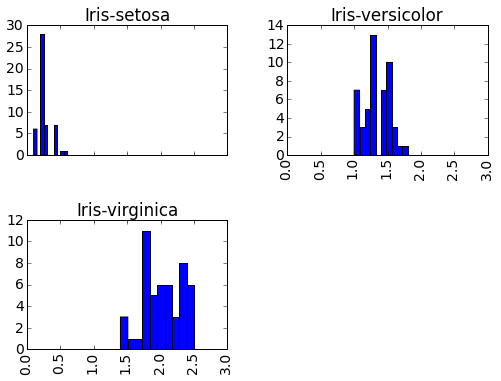

In [ ]:
# histogram of petal_width grouped by species
iris.hist(column='petal_width', by='species', sharex=True)

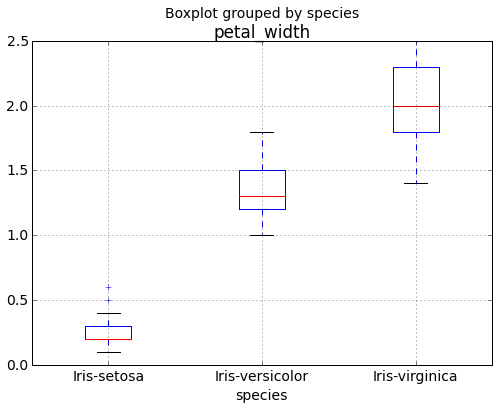

In [ ]:
# box plot of petal_width grouped by species
iris.boxplot(column='petal_width', by='species')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D15C1D0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000D61E0B8>]], dtype=object)

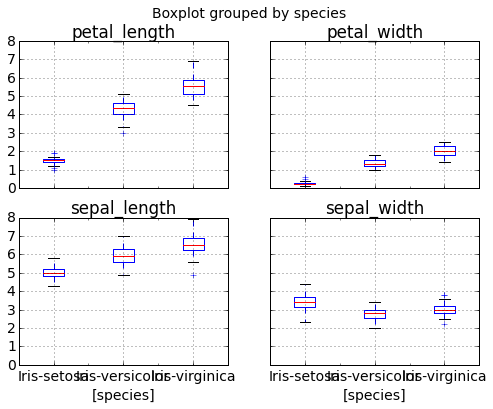

In [ ]:
# box plot of all numeric columns grouped by species
iris.boxplot(by='species')

In [ ]:
# map species to a numeric value so that plots can be colored by species
iris['species_num'] = iris.species.map({'Iris-setosa':0, 'Iris-versicolor':1, 'Iris-virginica':2})

# alternative method
iris['species_num'] = iris.species.factorize()[0]

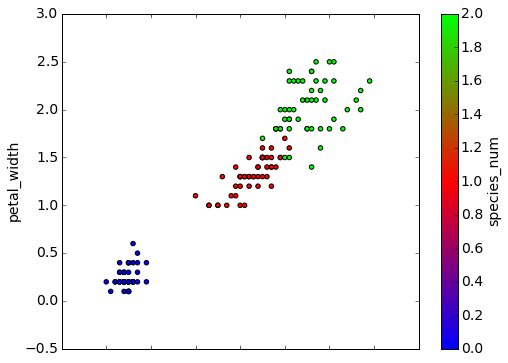

In [ ]:
# scatter plot of petal_length vs petal_width colored by species
iris.plot(kind='scatter', x='petal_length', y='petal_width', c='species_num', colormap='brg')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000000D60CC18>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000000000EF85AC8>]], dtype=object)

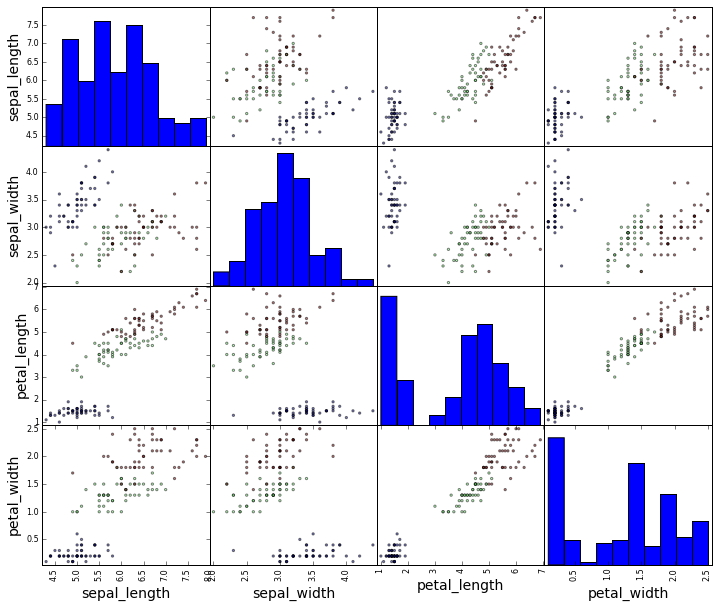

In [ ]:
# scatter matrix of all features colored by species
pd.scatter_matrix(iris.drop('species_num', axis=1), c=iris.species_num, figsize=(12, 10))

## Task 4

Write down a set of rules that could be used to predict species based on iris measurements.

In [ ]:
# define a new feature that represents petal area ("feature engineering")
iris['petal_area'] = iris.petal_length * iris.petal_width

In [ ]:
# description of petal_area grouped by species
iris.groupby('species').petal_area.describe().unstack()

,count,mean,std,min,25%,50%,75%,max
species,,,,,,,,
Iris-setosa,50,0.3628,0.183248,0.11,0.2650,0.300,0.42,0.96
Iris-versicolor,50,5.7204,1.368403,3.30,4.8600,5.615,6.75,8.64
Iris-virginica,50,11.2962,2.157412,7.50,9.7175,11.445,12.79,15.87


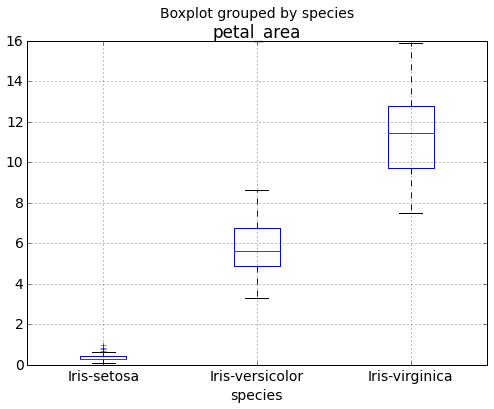

In [ ]:
# box plot of petal_area grouped by species
iris.boxplot(column='petal_area', by='species')

In [ ]:
# only show irises with a petal_area between 7 and 9
iris[(iris.petal_area > 7) & (iris.petal_area < 9)].sort('petal_area')

,sepal_length,sepal_width,petal_length,petal_width,species,species_num,petal_area
86,6.7,3.1,4.7,1.5,Iris-versicolor,1,7.05
85,6.0,3.4,4.5,1.6,Iris-versicolor,1,7.20
52,6.9,3.1,4.9,1.5,Iris-versicolor,1,7.35
72,6.3,2.5,4.9,1.5,Iris-versicolor,1,7.35
119,6.0,2.2,5.0,1.5,Iris-virginica,2,7.50
56,6.3,3.3,4.7,1.6,Iris-versicolor,1,7.52
106,4.9,2.5,4.5,1.7,Iris-virginica,2,7.65
133,6.3,2.8,5.1,1.5,Iris-virginica,2,7.65
134,6.1,2.6,5.6,1.4,Iris-virginica,2,7.84
83,6.0,2.7,5.1,1.6,Iris-versicolor,1,8.16


My set of rules for predicting species:

- If petal_area is less than 2, predict **setosa**.
- Else if petal_area is less than 7.4, predict **versicolor**.
- Otherwise, predict **virginica**.

## Bonus

Define a function that accepts a row of data and returns a predicted species. Then, use that function to make predictions for all existing rows of data, and check the accuracy of your predictions.

In [ ]:
# given a row of data, return a predicted species_num (0/1/2)
def classify_iris(row):

    # calculate the petal_area
    petal_area = row[2] * row[3]

    # predict the species based on the rules above
    if petal_area < 2:
        prediction = 'setosa'
    elif petal_area < 7.4:
        prediction = 'versicolor'
    else:
        prediction = 'virginica'

    # map the species name to a numeric value
    species_to_num = {'setosa':0, 'versicolor':1, 'virginica':2}

    # return that value
    return species_to_num[prediction]

In [ ]:
# print the first row
iris.iloc[0, :]

sepal_length            5.1
sepal_width             3.5
petal_length            1.4
petal_width             0.2
species         Iris-setosa
species_num               0
petal_area             0.28
Name: 0, dtype: object

In [ ]:
# print the last row
iris.iloc[149, :]

sepal_length               5.9
sepal_width                  3
petal_length               5.1
petal_width                1.8
species         Iris-virginica
species_num                  2
petal_area                9.18
Name: 149, dtype: object

In [ ]:
# test the function on the first and last rows
print classify_iris(iris.iloc[0, :])
print classify_iris(iris.iloc[149, :])

0
2


In [ ]:
# make predictions for all rows and store them in the DataFrame
iris['prediction'] = [classify_iris(row) for index, row in iris.iterrows()]

In [ ]:
# calculate the percentage of correct predictions
sum(iris.species_num == iris.prediction) / 150.

0.97333333333333338